In [1]:
%pylab inline
import pandas as pd
import seaborn as sn

Populating the interactive namespace from numpy and matplotlib


# buildsa

In [2]:
sa_time_df = pd.read_csv('sa_time.csv')
sa_time_df

,seq_len,sa_time,preftab_time
0,100000,0.007326,0.514531
1,250000,0.014183,1.180847
2,500000,0.027963,2.388358
3,1000000,0.053934,4.706593
4,2000000,0.120533,9.504672
5,4000000,0.260848,19.520400


Text(0, 0.5, 'SA Construction Time (seconds)')

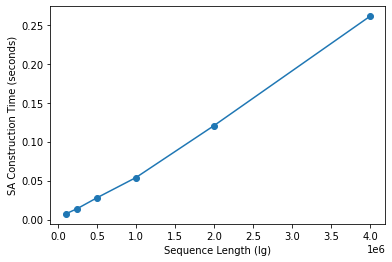

In [7]:
lengths = np.array(sa_time_df['seq_len'])
plt.plot(sa_time_df['seq_len'], sa_time_df['sa_time'], 'o-')
plt.xlabel('Sequence Length (lg)')
plt.ylabel('SA Construction Time (seconds)')
# plt.savefig('task_1/time_plot.png')

Text(0, 0.5, 'Prefix Table Construction Time (seconds)')

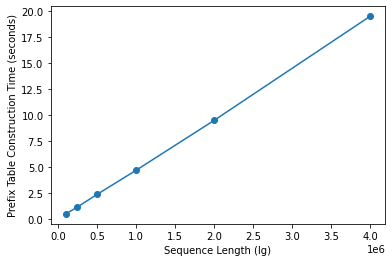

In [8]:
plt.plot(sa_time_df['seq_len'], sa_time_df['preftab_time'],'o-')
plt.xlabel('Sequence Length (lg)')
plt.ylabel('Prefix Table Construction Time (seconds)')

In [14]:
preftab_time_df = pd.read_csv('preftab_time.csv')
preftab_time_df.head()

,seq_len,k,preftab_time,preftab_size
0,100000,5,0.492334,37120
1,100000,10,1.272925,5061368
2,100000,20,2.037936,9588256
3,100000,30,2.811635,13585704
4,100000,50,3.591813,21581464


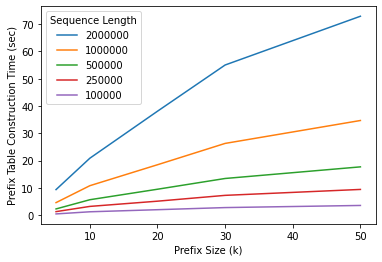

In [19]:
for seq_len in reversed(sorted(list(set(preftab_time_df['seq_len'])))):
    curr_df = preftab_time_df[preftab_time_df['seq_len'] == seq_len]
    plt.plot(curr_df['k'], curr_df['preftab_time'], label=seq_len)
plt.xlabel('Prefix Size (k)')
plt.ylabel('Prefix Table Construction Time (sec)')
plt.legend(title='Sequence Length')

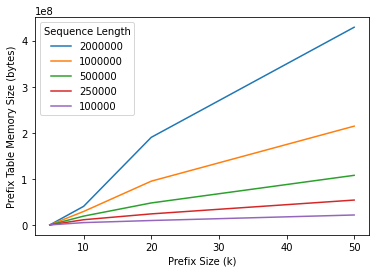

In [20]:
for seq_len in reversed(sorted(list(set(preftab_time_df['seq_len'])))):
    curr_df = preftab_time_df[preftab_time_df['seq_len'] == seq_len]
    plt.plot(curr_df['k'], curr_df['preftab_size'], label=seq_len)
plt.xlabel('Prefix Size (k)')
plt.ylabel('Prefix Table Memory Size (bytes)')
plt.legend(title='Sequence Length')